In [1]:
import argparse
import logging
import os
import sys

import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
from torch import optim
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader, random_split

sys.path.append("..")
sys.path.append("../scripts/")
import superlayer.utils

from scripts import eval_net, train_net, get_args

from superlayer.models import SuperNet, AESuperNet
from superlayer.utils import BrainD, dice_coeff, one_hot, plot_img_array, plot_side_by_side

In [2]:
dir_img = '/home/gid-dalcaav/projects/neuron/data/t1_mix/proc/resize256-crop_x32-slice100/train/vols/'
dir_mask = '/home/gid-dalcaav/projects/neuron/data/t1_mix/proc/resize256-crop_x32-slice100/train/asegs/'

dir_train = '/home/vib9/src/SL-Net/jupyter/partitions/train.txt'
dir_val = '/home/vib9/src/SL-Net/jupyter/partitions/val.txt'

dir_checkpoint_1 = 'checkpoints_1/'
dir_checkpoint_2 = 'checkpoints_2/'

In [3]:
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')
args = get_args()
device = torch.device('cuda')
logging.info(f'Using device {device}')

INFO: Using device cuda


In [4]:
target_label_numbers = [0,2,3,4,10,16,17,28,31,41,42,43,49,53,63]
val_percent = 0.1
batch_size = args.batchsize
lr = args.lr
img_scale = args.scale
writer = SummaryWriter(comment=f'LR_{lr}_BS_{batch_size}_SCALE_{img_scale}')

In [ ]:
net1 = SuperNet(input_ch=1, out_ch=15, use_bn=True, superblock_size=128, depth=4)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net1.to(device=device)
train_scores1, val_scores1, train_var_1, val_var_1 = train_net(net=net1,
                                                                epochs=5,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 7329 examples
INFO: Creating dataset with 7329 examples
INFO: Starting training:
        Epochs:          5
        Batch size:      8
        Learning rate:   0.001
        Training size:   7329
        Validation size: 7329
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Validation round:  74%|███████▍  | 681/916 [00:27<00:07, 31.37batch/s]


Validation round: 100%|█████████▉| 914/916 [00:37<00:00, 23.39batch/s]
                                                                      INFO: Validation Dice Loss: 0.10284217000495659
Validation round:  60%|██████    | 554/916 [00:28<00:15, 23.77batch/s]


Validation round:  99%|█████████▉| 910/916 [00:47<00:00, 14.72batch/s]
                                                                      INFO: Validation Dice Loss: 0.09630390105354213
Validation round:  21%|██        | 189/916 [00:10<00:39, 18.30batch/s]


Validation round:  68%|██████▊   | 624/916 [00:34<00:18, 15.51batch/s]


Validation round: 100%|█████████▉| 914/916 [00:50<00:00, 17.03batch/s]
                                                                      INFO: Validation Dice Loss: 0.09636542528021805
Validation round:  18%|█▊        | 169/916 [00:10<00:47, 15.76batch/s]


Validation round:  70%|███████   | 645/916 [00:35<00:15, 17.74batch/s]


Validation round: 100%|█████████▉| 912/916 [00:50<00:00, 15.23batch/s]
                                                                      INFO: Validation Dice Loss: 0.09496302488686997
Epoch 1/5:  90%|████████▉ | 6592/7329 [03:44<00:04, 167.61img/s, loss (batch)=0.326]

In [6]:
net2 = AESuperNet(input_ch=1, out_ch=15, use_bn=True, superblock_size=256, depth=4)

logging.info(f'Network:\n'
             f'\t{1} input channels\n'
             f'\t{15} output channels (classes)\n')

net2.to(device=device)
train_scores2, val_scores2, train_var_2, val_var_2 = train_net(net=net2,
                                                                epochs=5,
                                                                batch_size=args.batchsize,
                                                                lr=args.lr,
                                                                device=device,
                                                                img_scale=args.scale,
                                                                val_percent=args.val / 100,
                                                                checkpoint=2,
                                                                target_label_numbers=target_label_numbers,
                                                                writer=writer,
                                                                train_path=dir_train,
                                                                val_path=dir_val)

INFO: Network:
	1 input channels
	15 output channels (classes)

INFO: Creating dataset with 7329 examples
INFO: Creating dataset with 7329 examples
INFO: Starting training:
        Epochs:          5
        Batch size:      8
        Learning rate:   0.001
        Training size:   7329
        Validation size: 7329
        Checkpoints:     True
        Device:          cuda
        Images scaling:  1
    
Validation round:  24%|██▍       | 220/916 [00:12<00:35, 19.81batch/s]


Validation round:  49%|████▉     | 452/916 [00:24<00:23, 19.50batch/s]


Validation round:  74%|███████▍  | 678/916 [00:36<00:12, 18.99batch/s]


Validation round: 100%|█████████▉| 913/916 [00:48<00:00, 20.03batch/s]


Validation round: 100%|██████████| 916/916 [00:48<00:00, 20.01batch/s]
                                                                      INFO: Validation Dice Loss: 0.20637315863084585
Validation round:  24%|██▍       | 218/916 [00:12<00:35, 19.42batch/s]


Validation round:  51%|█████     | 464/916 [00:24<00:22, 20.01batch/s]


Validation round:  77%|███████▋  | 709/916 [00:37<00:10, 19.94batch/s]


Validation round: 100%|██████████| 916/916 [00:48<00:00, 19.20batch/s]
                                                                      INFO: Validation Dice Loss: 0.19627758675136942
Validation round:   3%|▎         | 24/916 [00:02<01:00, 14.79batch/s]


Validation round:  31%|███       | 280/916 [00:15<00:31, 20.19batch/s]


Validation round:  58%|█████▊    | 528/916 [00:27<00:19, 19.51batch/s]


Validation round:  84%|████████▍ | 774/916 [00:40<00:07, 19.05batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 19.11batch/s]
                                                                      INFO: Validation Dice Loss: 0.15177462327265584
Validation round:   9%|▉         | 84/916 [00:05<00:51, 16.16batch/s]


Validation round:  37%|███▋      | 336/916 [00:18<00:30, 19.24batch/s]


Validation round:  66%|██████▋   | 608/916 [00:32<00:17, 17.93batch/s]


Validation round:  96%|█████████▌| 877/916 [00:46<00:02, 19.22batch/s]


Validation round: 100%|█████████▉| 914/916 [00:48<00:00, 20.27batch/s]
                                                                      INFO: Validation Dice Loss: 0.15293120020211523
Validation round:  21%|██        | 194/916 [00:12<00:38, 19.00batch/s]


Validation round:  50%|████▉     | 457/916 [00:25<00:24, 19.06batch/s]


Validation round:  79%|███████▉  | 727/916 [00:39<00:09, 19.38batch/s]


Validation round: 100%|██████████| 916/916 [00:48<00:00, 19.60batch/s]
                                                                      INFO: Validation Dice Loss: 0.10962098802736753
Epoch 1/5: 100%|██████████| 7329/7329 [06:19<00:00, 19.31img/s, loss (batch)=0.494]
INFO: Checkpoint 1 saved !
Validation round:   8%|▊         | 70/916 [00:04<00:41, 20.16batch/s]


Validation round:  36%|███▌      | 326/916 [00:17<00:29, 19.81batch/s]


Validation round:  65%|██████▍   | 595/916 [00:31<00:16, 19.03batch/s]


Validation round:  92%|█████████▏| 842/916 [00:43<00:03, 19.17batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 19.51batch/s]
                                                                      INFO: Validation Dice Loss: 0.09368362746254326
Validation round:  18%|█▊        | 165/916 [00:09<00:39, 19.23batch/s]


Validation round:  43%|████▎     | 397/916 [00:21<00:27, 19.18batch/s]


Validation round:  72%|███████▏  | 660/916 [00:34<00:13, 19.67batch/s]


Validation round: 100%|█████████▉| 912/916 [00:47<00:00, 19.71batch/s]


Validation round: 100%|██████████| 916/916 [00:47<00:00, 19.82batch/s]
                                                                      INFO: Validation Dice Loss: 0.08251908094536789
Validation round:  27%|██▋       | 245/916 [00:13<00:35, 19.03batch/s]


Validation round:  54%|█████▍    | 494/916 [00:26<00:21, 19.84batch/s]


Validation round:  80%|███████▉  | 729/916 [00:38<00:09, 19.59batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 19.25batch/s]
                                                                      INFO: Validation Dice Loss: 0.0804011198045385
Validation round:   5%|▍         | 43/916 [00:03<00:44, 19.64batch/s]


Validation round:  32%|███▏      | 291/916 [00:15<00:31, 19.73batch/s]


Validation round:  60%|██████    | 553/916 [00:28<00:18, 19.88batch/s]


Validation round:  89%|████████▉ | 814/916 [00:42<00:05, 20.08batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 19.53batch/s]
                                                                      INFO: Validation Dice Loss: 0.07920545840627762
Validation round:  16%|█▌        | 148/916 [00:08<00:38, 20.14batch/s]


Validation round:  44%|████▎     | 399/916 [00:21<00:27, 18.99batch/s]


Validation round:  69%|██████▉   | 636/916 [00:33<00:14, 19.05batch/s]


Validation round:  97%|█████████▋| 886/916 [00:46<00:01, 18.93batch/s]


Validation round: 100%|█████████▉| 915/916 [00:48<00:00, 19.61batch/s]
                                                                      INFO: Validation Dice Loss: 0.07630748575854249
Epoch 2/5: 100%|██████████| 7329/7329 [06:16<00:00, 19.46img/s, loss (batch)=0.142]
INFO: Checkpoint 2 saved !
Validation round:  20%|██        | 187/916 [00:11<00:36, 19.86batch/s]


Validation round:  50%|████▉     | 457/916 [00:24<00:24, 19.06batch/s]


Validation round:  78%|███████▊  | 717/916 [00:38<00:09, 20.02batch/s]


Validation round: 100%|██████████| 916/916 [00:48<00:00, 20.02batch/s]
                                                                      INFO: Validation Dice Loss: 0.07626761567644677
Validation round:   4%|▍         | 41/916 [00:02<00:46, 18.85batch/s]


Validation round:  31%|███       | 286/916 [00:15<00:31, 19.74batch/s]


Validation round:  59%|█████▊    | 536/916 [00:28<00:19, 19.58batch/s]


Validation round:  84%|████████▍ | 774/916 [00:40<00:07, 19.16batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 19.18batch/s]
                                                                      INFO: Validation Dice Loss: 0.07533892920834528
Validation round:  11%|█         | 101/916 [00:05<00:42, 19.17batch/s]


Validation round:  39%|███▉      | 361/916 [00:19<00:28, 19.65batch/s]


Validation round:  66%|██████▌   | 601/916 [00:31<00:16, 19.01batch/s]


Validation round:  93%|█████████▎| 852/916 [00:44<00:03, 19.97batch/s]


Validation round: 100%|██████████| 916/916 [00:47<00:00, 19.15batch/s]
                                                                      INFO: Validation Dice Loss: 0.07462872516803086
Validation round:  17%|█▋        | 159/916 [00:09<00:39, 19.24batch/s]


Validation round:  46%|████▌     | 417/916 [00:22<00:25, 19.55batch/s]


Validation round:  75%|███████▌  | 689/916 [00:35<00:11, 19.16batch/s]


Validation round: 100%|██████████| 916/916 [00:47<00:00, 19.42batch/s]
                                                                      INFO: Validation Dice Loss: 0.0731580464990899


Validation round:  26%|██▋       | 242/916 [00:13<00:33, 19.87batch/s]


Validation round:  53%|█████▎    | 483/916 [00:25<00:22, 18.96batch/s]


Validation round:  80%|███████▉  | 729/916 [00:38<00:09, 20.13batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 20.13batch/s]
                                                                      INFO: Validation Dice Loss: 0.07273818670434462
Epoch 3/5: 100%|██████████| 7329/7329 [06:18<00:00, 19.35img/s, loss (batch)=0.117]
INFO: Checkpoint 3 saved !
Validation round:   5%|▌         | 48/916 [00:03<00:43, 19.97batch/s]


Validation round:  32%|███▏      | 294/916 [00:15<00:32, 18.86batch/s]


Validation round:  59%|█████▉    | 545/916 [00:28<00:19, 18.91batch/s]


Validation round:  87%|████████▋ | 797/916 [00:41<00:06, 19.33batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 19.10batch/s]
                                                                      INFO: Validation Dice Loss: 0.07256297879409061
Validation round:  11%|█         | 98/916 [00:05<00:41, 19.71batch/s]


Validation round:  38%|███▊      | 347/916 [00:20<00:28, 19.88batch/s]


Validation round:  67%|██████▋   | 615/916 [00:34<00:15, 18.94batch/s]


Validation round:  95%|█████████▍| 870/916 [00:47<00:02, 19.62batch/s]


Validation round: 100%|██████████| 916/916 [00:49<00:00, 20.20batch/s]
                                                                      INFO: Validation Dice Loss: 0.07061347441837257
Validation round:  23%|██▎       | 209/916 [00:11<00:36, 19.47batch/s]


Validation round:  49%|████▉     | 447/916 [00:23<00:24, 19.04batch/s]


Validation round:  76%|███████▌  | 694/916 [00:36<00:11, 20.06batch/s]


Validation round: 100%|██████████| 916/916 [00:47<00:00, 19.35batch/s]
                                                                      INFO: Validation Dice Loss: 0.07427052205924645
Validation round:   0%|          | 3/916 [00:00<08:47,  1.73batch/s]


Validation round:  30%|███       | 276/916 [00:14<00:32, 19.97batch/s]


Validation round:  57%|█████▋    | 518/916 [00:27<00:20, 19.07batch/s]


Validation round:  84%|████████▍ | 773/916 [00:40<00:07, 19.00batch/s]


Validation round: 100%|██████████| 916/916 [00:47<00:00, 19.99batch/s]
                                                                      INFO: Validation Dice Loss: 0.07143078182364396
Validation round:  11%|█         | 97/916 [00:05<00:42, 19.29batch/s]


Validation round:  39%|███▉      | 360/916 [00:19<00:27, 19.86batch/s]


Validation round:  66%|██████▋   | 609/916 [00:31<00:15, 19.94batch/s]


Validation round:  93%|█████████▎| 856/916 [00:44<00:03, 19.78batch/s]


Validation round: 100%|██████████| 916/916 [00:47<00:00, 19.54batch/s]
                                                                      INFO: Validation Dice Loss: 0.06961841855246947
Epoch 4/5: 100%|██████████| 7329/7329 [06:18<00:00, 19.35img/s, loss (batch)=0.118]
INFO: Checkpoint 4 saved !
Validation round:  19%|█▉        | 173/916 [00:09<00:37, 19.74batch/s]


Validation round:  47%|████▋     | 426/916 [00:22<00:25, 19.28batch/s]


Validation round:  72%|███████▏  | 656/916 [00:34<00:13, 19.18batch/s]


Validation round:  97%|█████████▋| 884/916 [00:46<00:01, 19.10batch/s]


Validation round: 100%|██████████| 916/916 [00:48<00:00, 20.36batch/s]
                                                                      INFO: Validation Dice Loss: 0.0693890730968339
Validation round:  24%|██▍       | 221/916 [00:12<00:34, 20.18batch/s]


Validation round:  50%|████▉     | 456/916 [00:24<00:23, 19.56batch/s]


Validation round:  76%|███████▋  | 699/916 [00:36<00:11, 19.35batch/s]


Validation round: 100%|█████████▉| 915/916 [00:47<00:00, 20.03batch/s]
                                                                      INFO: Validation Dice Loss: 0.06776508326158252
Validation round:   3%|▎         | 29/916 [00:02<00:50, 17.74batch/s]


Validation round:  32%|███▏      | 296/916 [00:15<00:30, 20.01batch/s]


Validation round:  59%|█████▉    | 542/916 [00:28<00:19, 19.64batch/s]


Validation round:  86%|████████▌ | 787/916 [00:41<00:06, 18.90batch/s]


Validation round: 100%|██████████| 916/916 [00:47<00:00, 19.39batch/s]
                                                                      INFO: Validation Dice Loss: 0.06845793396429724
Validation round:  12%|█▏        | 106/916 [00:06<00:42, 18.98batch/s]


Validation round:  38%|███▊      | 347/916 [00:18<00:29, 19.33batch/s]


Validation round:  64%|██████▍   | 585/916 [00:30<00:17, 19.01batch/s]


Validation round:  90%|████████▉ | 823/916 [00:43<00:04, 19.75batch/s]


Validation round: 100%|██████████| 916/916 [00:47<00:00, 20.28batch/s]
                                                                      INFO: Validation Dice Loss: 0.06721666067285569
Validation round:  16%|█▌        | 148/916 [00:08<00:38, 19.93batch/s]


Validation round:  45%|████▌     | 413/916 [00:21<00:25, 19.46batch/s]


Validation round:  74%|███████▍  | 679/916 [00:35<00:12, 19.05batch/s]


Validation round:  99%|█████████▉| 907/916 [00:47<00:00, 19.47batch/s]


Validation round: 100%|█████████▉| 914/916 [00:47<00:00, 19.88batch/s]
                                                                      INFO: Validation Dice Loss: 0.06660427365403249
Epoch 5/5: 100%|██████████| 7329/7329 [06:16<00:00, 19.44img/s, loss (batch)=0.105]
INFO: Checkpoint 5 saved !


configuring combined plots


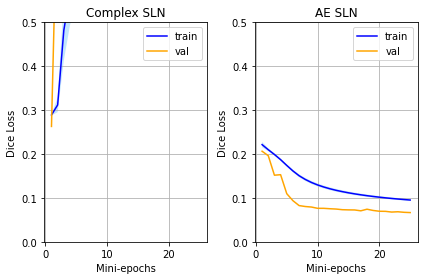

In [7]:
print("configuring combined plots")
domain = len(train_scores1)
x_values = [i+1 for i in range(domain)]
             
a3 = plt.subplot(1,2,1)
a3.set_ylim([0, 0.5])
plt.title("Complex SLN")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores1, train_var_1)]
ziptraindown = [a - b for a, b in zip(train_scores1, train_var_1)]
zipvalup = [a + b for a, b in zip(val_scores1, val_var_1)]
zipvaldown = [a - b for a, b in zip(val_scores1, val_var_1)]

plt.plot(x_values, train_scores1, color="blue", label="train")
a3.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores1, color="orange", label="val")
a3.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

a4 = plt.subplot(1,2,2)
a4.set_ylim([0, 0.5])
plt.title("AE SLN")
plt.xlabel("Mini-epochs")
plt.ylabel("Dice Loss")

ziptrainup = [a + b for a, b in zip(train_scores2, train_var_2)]
ziptraindown = [a - b for a, b in zip(train_scores2, train_var_2)]
zipvalup = [a + b for a, b in zip(val_scores2, val_var_2)]
zipvaldown = [a - b for a, b in zip(val_scores2, val_var_2)]

plt.plot(x_values, train_scores2, color="blue", label="train")
a4.fill_between(x_values, ziptrainup, ziptraindown, facecolor='lightskyblue', alpha=0.5)
plt.plot(x_values, val_scores2, color="orange", label="val")
a4.fill_between(x_values, zipvalup, zipvaldown, facecolor='navajowhite', alpha=0.5)

plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

plt.close()